In [1]:
import pandas as pd
import numpy as np
from numpy import exp, log
from lroptimizer import LROptimizer

In [2]:
df = pd.read_excel(
    'Classification_proportions_in_GroundTruth_v2.xlsx',
    index_col=1
)

efs_kwargs = dict(
    df = df, 
    hazard_col = 'Hazard Prediction (-1.0 ~ 1.0)',
    events_col = 'Censored (EFS)',
    times_col = 'Event Free Survival'
)

lro1 = LROptimizer(**efs_kwargs)

# Cutoffs tried previously

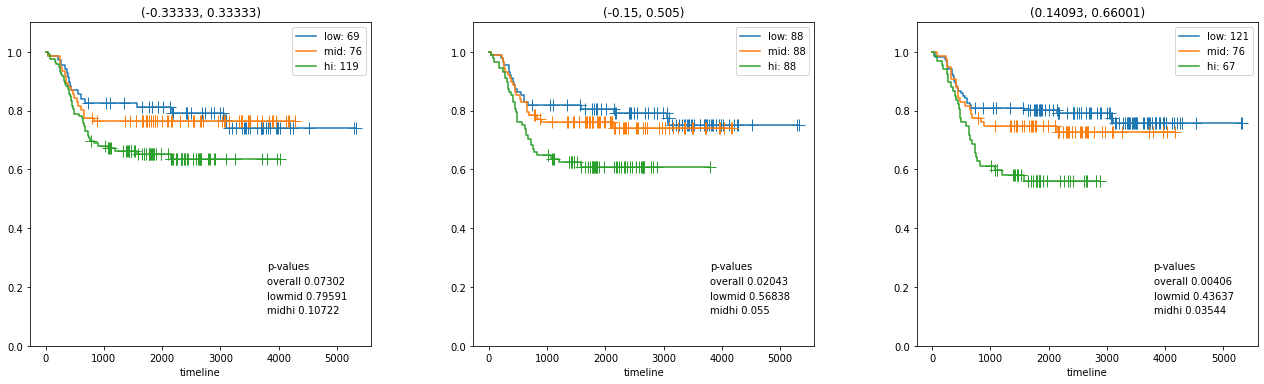

In [3]:

# Equal intervals in hazard space.
EQ = (-.33333, .33333)

# Three equally-sized groups.
THIRDS = (-.15, .505)

# Equal intervals in exponentially-rescaled hazard space. 
exp_cutoffs = np.linspace(exp(-1), exp(1), 4)[1:-1]
as_linear = log(exp_cutoffs)
EXP = tuple(as_linear)


# Note that the LROptimizer program is only being used here for its plotting methods.
lro1.compare_plots(EQ, THIRDS, EXP)

# Optimizing group separation
## 1a. Search below *overall* p-value cutoff

In [4]:
lro1.search(by_overall=True, max_p=.001)

60 cutoff pairs found with:
- Overall p-value < 0.001


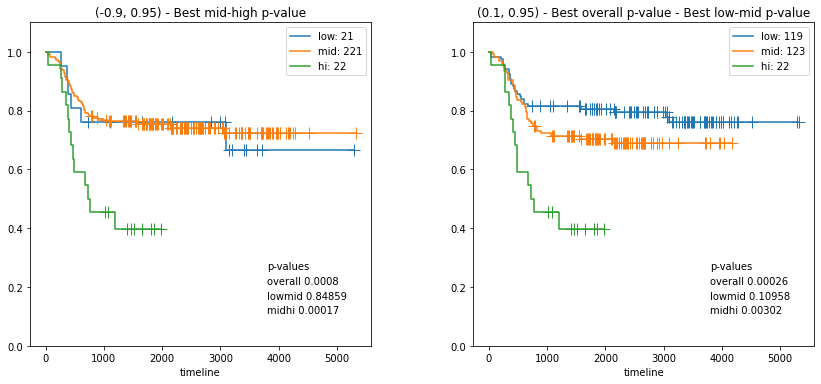

In [5]:
lro1.plot_best()

## 1b. Restrict group sizes 

In [6]:
lro2 = LROptimizer(**efs_kwargs)
lro2.search(by_overall=True, max_p=.001, min_groupsize=.1, max_groupsize=.5)

13 cutoff pairs found with:
- Overall p-value < 0.001
- No groups with less than 10% of samples.
- No groups with more than 50% of samples.


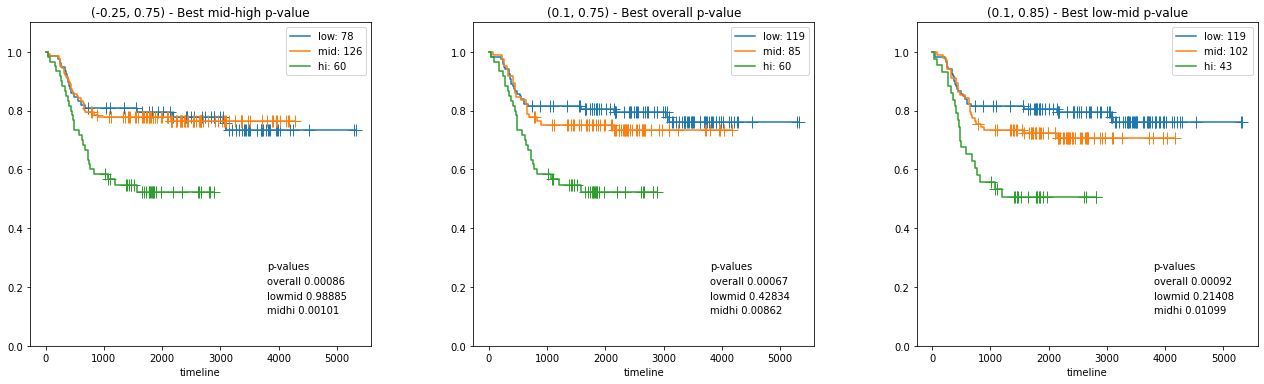

In [7]:
lro2.plot_best()

## 2a. Search below a *low-mid and mid-high* p-value cutoff.

In [8]:
lro3 = LROptimizer(**efs_kwargs)
lro3.search(max_p=.2)

22 cutoff pairs found with:
- All p-values < 0.2


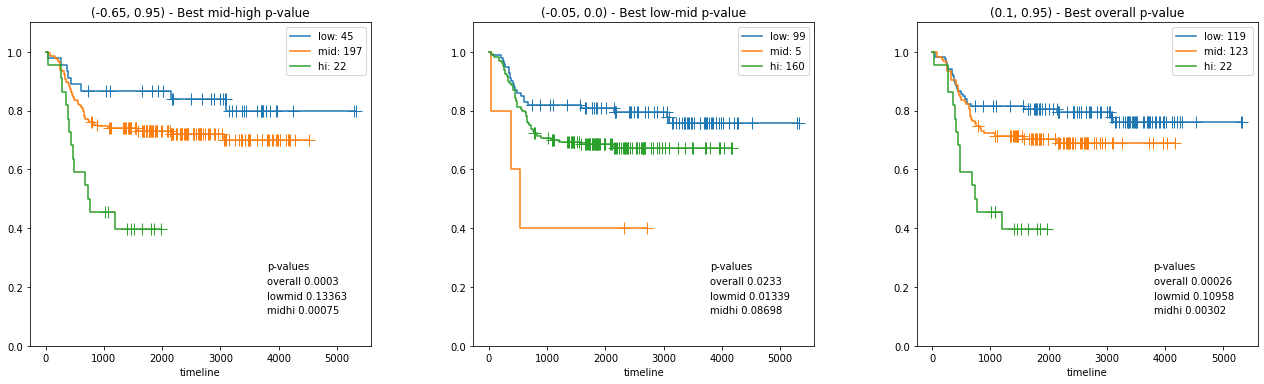

In [9]:
lro3.plot_best()

## 2b. Restrict group sizes

In [10]:
lro4 = LROptimizer(**efs_kwargs)
lro4.search(max_p=.2, min_groupsize=.1, max_groupsize=.5)

2 cutoff pairs found with:
- All p-values < 0.2
- No groups with less than 10% of samples.
- No groups with more than 50% of samples.


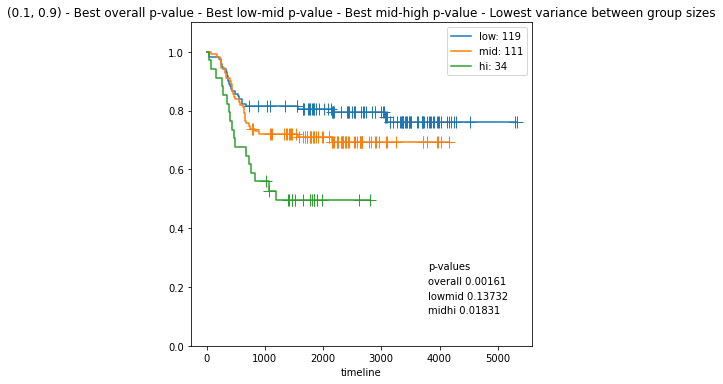

In [11]:
lro4.plot_best()